In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import dash
import plotly
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
from re import sub
from decimal import Decimal
import plotly.figure_factory as ff
# clean na
def clean_na(df, item): return df[df[item].notna()]


In [2]:
df = pd.read_csv('Airbnb_1.csv')


C:\Users\lynch\AppData\Local\Temp\ipykernel_2392\3645485711.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_1.csv')


## clean data


In [4]:
df = pd.read_csv('Airbnb/airbnb_open_data.csv')

# near regions
print(np.shape(df))
df = clean_na(df, 'neighbourhood group')
# print(np.shape(df))
df = clean_na(df, 'price')
# print(np.shape(df))
# transfer money to float number
df['price'] = df['price'][:].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'][:].replace(
    '[\$,]', '', regex=True).astype(float)
print(df['neighbourhood group'].value_counts()) # remove 'brookln', 'manhatan'
df = df[df['neighbourhood group'] != 'brookln']
df = df[df['neighbourhood group'] != 'manhatan']
print(np.shape(df))
df = clean_na(df, 'neighbourhood group')
print(np.shape(df))
print(df['neighbourhood group'].value_counts())
print(np.shape(df))
# # df.dtypes
# df.to_csv('Airbnb_1.csv')


/var/folders/v5/58blb36d3cd187h7fcrmrb640000gn/T/ipykernel_21978/4076104231.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb/airbnb_open_data.csv')


(102599, 26)
Manhattan        43682
Brooklyn         41749
Queens           13234
Bronx             2705
Staten Island      952
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64
(102322, 26)
(102322, 26)
Manhattan        43682
Brooklyn         41749
Queens           13234
Bronx             2705
Staten Island      952
Name: neighbourhood group, dtype: int64
(102322, 26)


## Index


array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'host id'}>,
        <AxesSubplot: title={'center': 'lat'}>,
        <AxesSubplot: title={'center': 'long'}>],
       [<AxesSubplot: title={'center': 'Construction year'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'service fee'}>,
        <AxesSubplot: title={'center': 'minimum nights'}>],
       [<AxesSubplot: title={'center': 'number of reviews'}>,
        <AxesSubplot: title={'center': 'reviews per month'}>,
        <AxesSubplot: title={'center': 'review rate number'}>,
        <AxesSubplot: title={'center': 'calculated host listings count'}>],
       [<AxesSubplot: title={'center': 'availability 365'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

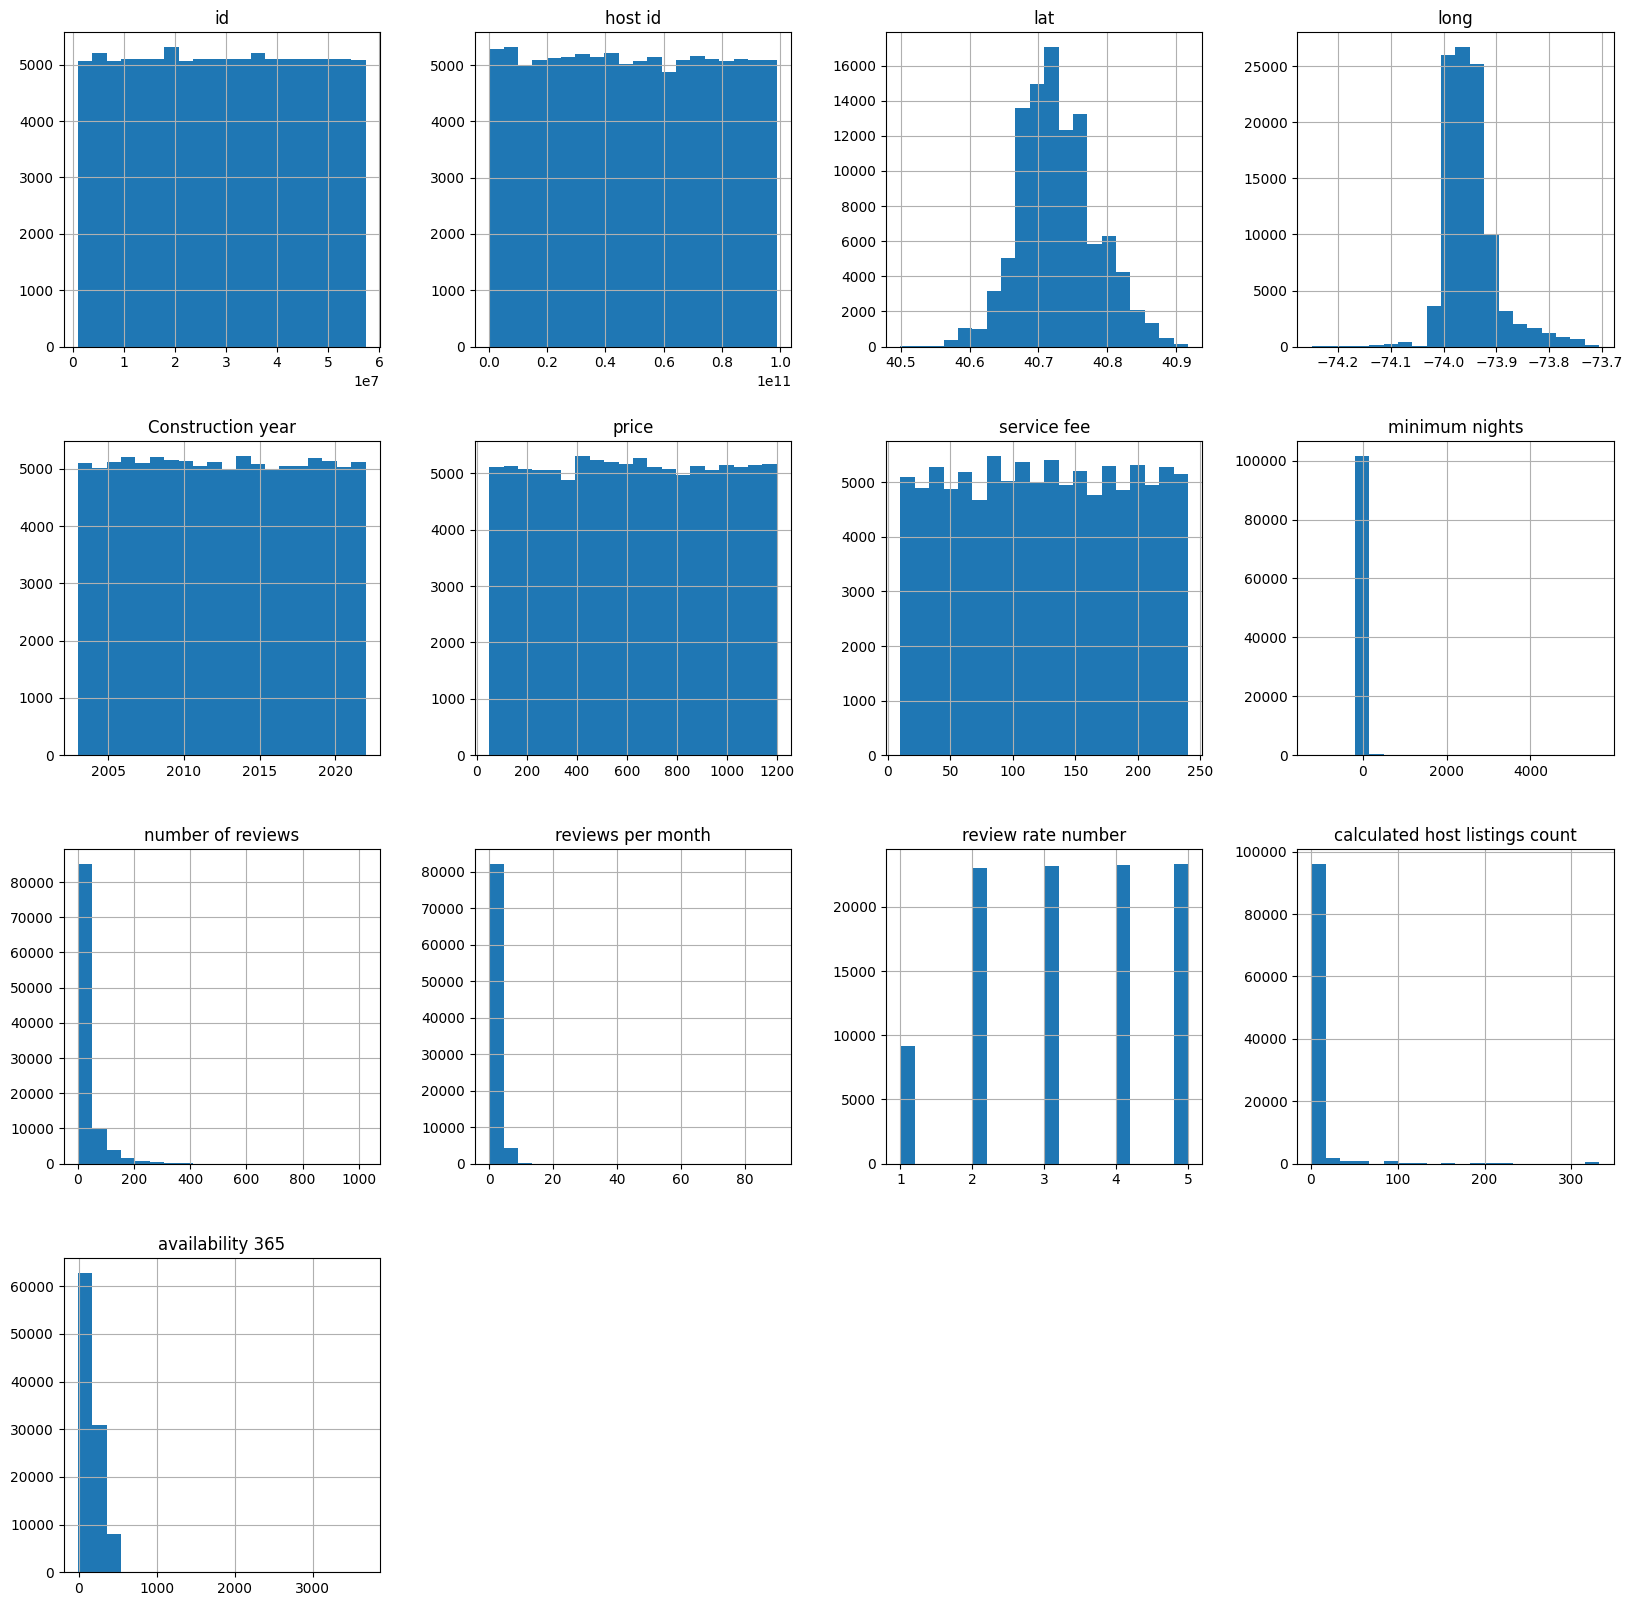

In [14]:
Keys_item = pd.DataFrame(df.keys())

df.dtypes
# Plotting the distribution of numerical and boolean categories (matplotlib)
df.hist(figsize=(20,20), bins=20)

(array([[<AxesSubplot: title={'center': 'review rate number'}>]],
       dtype=object),
 3285)

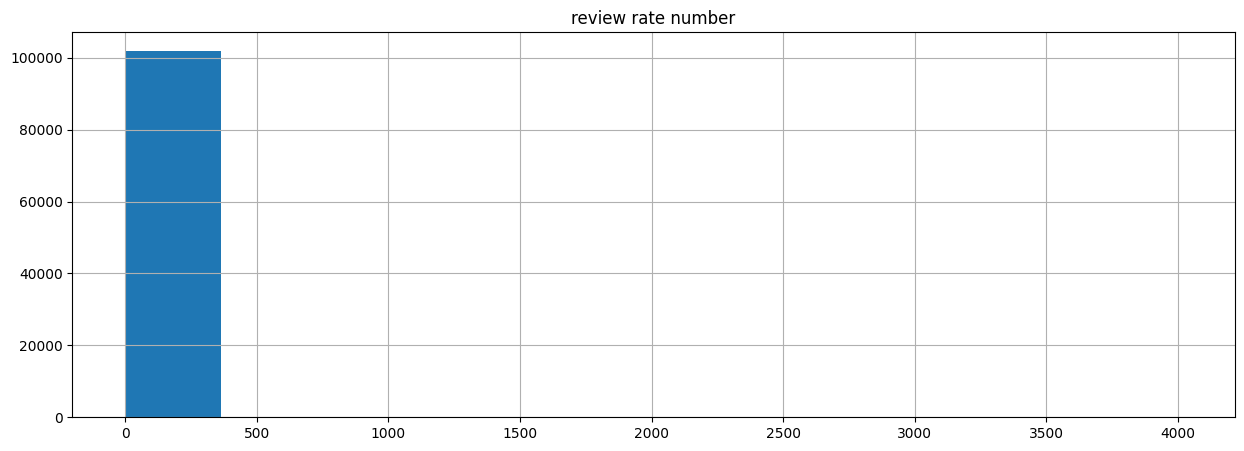

In [15]:
df.hist(['review rate number'], figsize=(15,5), bins=[0, 1*365, 2*365, 3*365, 4*365, 5*365, 6*365, 7*365, 8*365, 10*365, 11*365]), 9*365

In [22]:
import plotly.express as px

df_ = df[df['neighbourhood group']=='Brookly']

fig = px.line(df_, x="Construction year", y="price")
fig.show()


Series([], Name: Construction year, dtype: float64)

# Information

Location: central location: `lat: 40.72228, long: -73.95444`

[dataframe manipulate](https://blog.csdn.net/qq_41853758/article/details/83280104)


In [7]:
# df['neighbourhood'].value_counts() # 224 locations
lat = df['lat'].median()
long = df['long'].median()
print('central location:', lat, long)


central location: 40.72228 -73.95444


## relevant information


In [17]:
df['room type'].value_counts()
print(np.shape(df))
df = clean_na(df, 'room type')
df['neighbourhood group'].value_counts()
df['neighbourhood'].value_counts()

(102322, 26)


Bedford-Stuyvesant        7920
Williamsburg              7751
Harlem                    5453
Bushwick                  4963
Hell's Kitchen            3961
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

## Simple violin funciton


In [4]:
# df = df[df['Construction year']>2020] # for the new building
import plotly.express as px
test = df[df['Construction year'] > 2015]  # for the new building


def violin_plot(df, item1, item2):
    df = df[df[item1].notna()]
    df = df[df[item2].notna()]
    return px.violin(df, x=item1, y=item2, title='Plotly Express Box Plot')


violin_plot(test, 'room type', 'price')


# Option list

Those items are lower value counts ($2 <option items<10$)


In [57]:
import pandas as pd
import plotly.express as px

len(df['cancellation_policy'].value_counts())

# items appropriate to plot violins
for i in df.keys():
    if len(df[i].value_counts()) < 10 and len(df[i].value_counts()) > 2:
        print(i)

fam_place = df['neighbourhood'].unique().tolist()
# for i in fam_place:
#     if len(df[df['neighbourhood'] == i ]) > 1000:
#         place
len(df[df['neighbourhood'] == fam_place[0]])
a = df[df['neighbourhood'] == fam_place[0]]
b = df[df['neighbourhood'] == fam_place[1]]


neighbourhood group
cancellation_policy
room type
review rate number


In [ ]:
# PLOT NEIGHBOUR

# fig = px.scatter(df, x='lat', y='long', color='neighbourhood',
#                  title="Conditionally Updating Traces In A Plotly Express Figure With for_each_trace()")

# fig.for_each_trace(
#     lambda trace: trace.update(marker_symbol="square") if trace.name == "setosa" else (),
# )

# fig.show()


# [Map](https://plotly.com/python/mapbox-county-choropleth/)


In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

counties["features"][0]


In [8]:
import plotly.express as px
import geopandas as gpd
# map

map_ = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(map_, geojson=geojson, color="winner",
                           locations="district", featureidkey="properties.district",
                           center={"lat": lat, "lon": long},
                           mapbox_style="carto-positron", zoom=10)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()


# dcc component


In [13]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash

# app = dash.Dash(__name__)
# app = JupyterDash(__name__)
app = JupyterDash('SimpleExample')

app.layout = html.Div([

    html.H1("Web Application Dashboards with Dash",
            style={'text-align': 'center'}),

    dcc.Dropdown(id="slct_month",
                 options=[
                     {"label": "Jan", "value": 1},
                     {"label": "Feb", "value": 2},
                     {"label": "Mar", "value": 3},
                     {"label": "Apr", "value": 4},
                     {"label": "May", "value": 5},
                     {"label": "Jun", "value": 6},
                     {"label": "Jul", "value": 7},
                     {"label": "Aug", "value": 8},
                     {"label": "Sep", "value": 9},
                     {"label": "Oct", "value": 10},
                     {"label": "Nov", "value": 11},
                     {"label": "Dec", "value": 12}],
                 value=1,
                 style={'width': "40%"}
                 ),
    html.Div(id='output_container', children=[]),
    # html.Br(),
    #
    # dcc.Graph(id='my_bee_map',figure={})

])


@app.callback(
    Output('output_container', 'children'),
    Input('slct_month', 'value')
)
def run_server(self,
               port=8050,
               debug=True,
               threaded=True,
               **flask_run_options):
    self.server.run(port=port, debug=debug, **flask_run_options)


def updata_output(value):
    return 'You have selected the {} th month'.format(value)

# if __name__=='__main__':
#     # app.run_server(debug=True)
#     app.run_server(mode='inline')


app.run_server(mode='inline', port=8051)


In [13]:
from dash import Dash, html, dcc
from jupyter_dash import JupyterDash

app = JupyterDash(__name__)
# app = Dash(__name__) # run on server

# neighbourhood group

app.layout = html.Div([
    neighbour=df['neighbourhood group'].unique().tolist()  # make option list
    dcc.Dropdown(neighbour)
])

if __name__ == '__main__':
    app.run_server(mode='inline', port=8050)
    # app.run_server(debug=True) # run on server
